In [1]:
#https://www.opentechguides.com/how-to/article/dataanalytics/179/jupyter-notebook-pandas.html

In [12]:
!head pp-2018-part1.csv

"{79A74E21-D11E-1289-E053-6B04A8C01627}","770000","2018-09-25 00:00","SK7 1AR","D","N","F","5","","OAK MEADOW","BRAMHALL","STOCKPORT","STOCKPORT","GREATER MANCHESTER","A","A"
"{79A74E21-D11F-1289-E053-6B04A8C01627}","253500","2018-09-24 00:00","M6 8GQ","D","N","F","1","","RIVINGTON ROAD","","SALFORD","SALFORD","GREATER MANCHESTER","A","A"
"{79A74E21-D120-1289-E053-6B04A8C01627}","231950","2018-09-28 00:00","WA3 2UE","D","Y","F","35","","STONEACRE CLOSE","LOWTON","WARRINGTON","WIGAN","GREATER MANCHESTER","A","A"
"{79A74E21-D121-1289-E053-6B04A8C01627}","112500","2018-08-29 00:00","OL6 6RJ","S","N","F","102","","THORNFIELD GROVE","","ASHTON-UNDER-LYNE","TAMESIDE","GREATER MANCHESTER","A","A"
"{79A74E21-D122-1289-E053-6B04A8C01627}","184995","2018-06-15 00:00","M46 0TW","S","Y","F","37","","THREADNEEDLE PLACE","ATHERTON","MANCHESTER","WIGAN","GREATER MANCHESTER","A","A"
"{79A74E21-D123-1289-E053-6B04A8C01627}","214995","2018-09-28 00:00","M28 3XS","D","Y","L","9","","MARPLE GARDENS","WORS

In [14]:
import pandas as pd

In [20]:
csv_file="pp-2018-part1.csv"

# df = pandas dataframe
# basically, tabular data

df = pd.read_csv(csv_file, names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

In [35]:
# df = datadrame

#loc : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
# in this case looks like we're calling .loc with a series

#Select only record type A and property type not "O"
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']

# Select transactions for August 2018
df = df[(df["Sale Date"].dt.year==2018) & (df["Sale Date"].dt.month==8)]


In [27]:
callable(df['Record Status'] == 'A')

False

In [31]:
type( df['Record Status'] == 'A' )

pandas.core.series.Series

In [34]:
type( df['Record Status'] )

pandas.core.series.Series

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

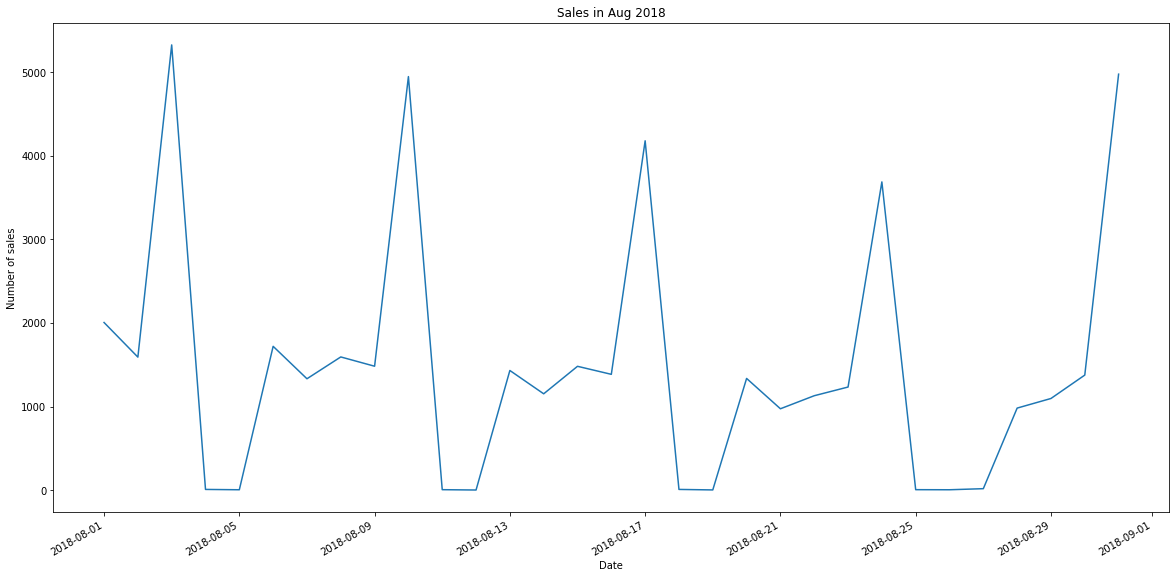

In [45]:
# Daily sales volume for august 2018
daily_sales_vol = df["Sale Date"].value_counts()
daily_sales_vol.plot()
plt.title('Sales in Aug 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Text(0.5, 0, 'Date')

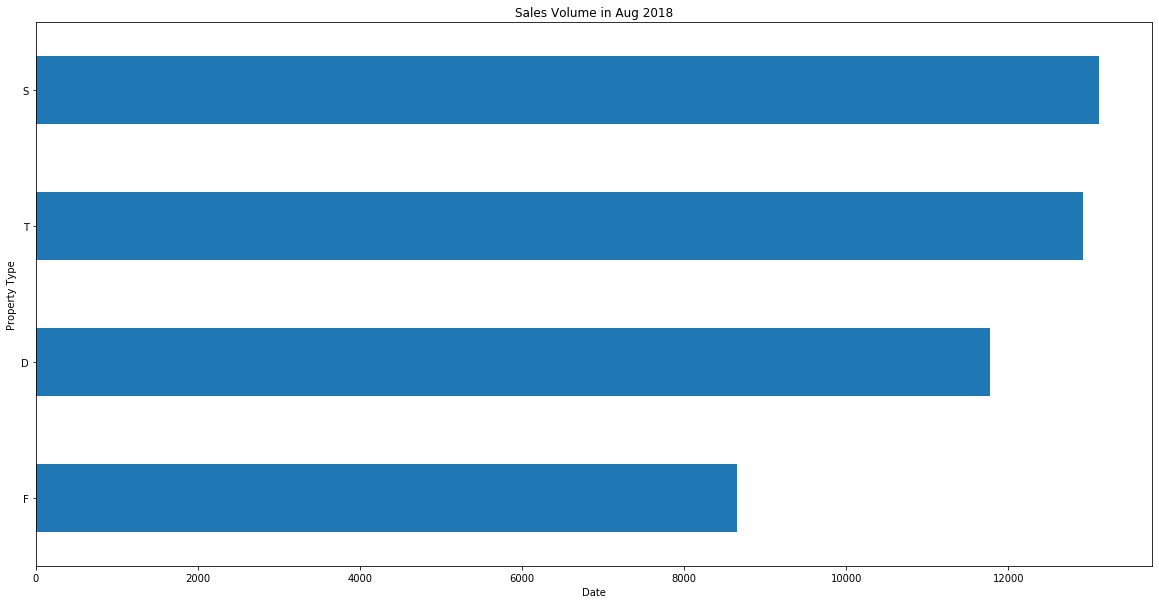

In [47]:
# Number of residential property transactions in Aug 2018 by property type
sales_by_type = df["Property Type"].value_counts()
sales_by_type.sort_values().plot(kind='barh')
plt.title('Sales Volume in Aug 2018')
plt.ylabel('Property Type')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

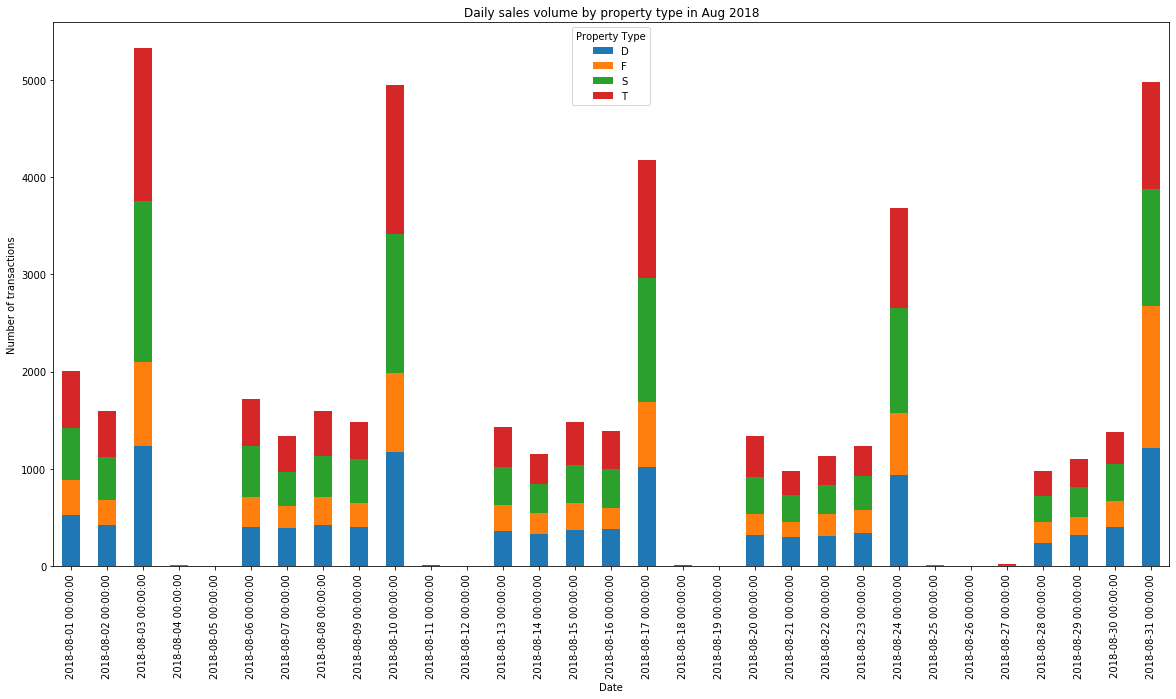

In [48]:
# Daily sales volume by property type
df.groupby(['Sale Date','Property Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Daily sales volume by property type in Aug 2018')
plt.ylabel('Number of transactions')
plt.xlabel('Date')